In [47]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset , random_mini_batches, convert_to_one_hot , predict

%matplotlib inline
np.random.seed(1)

Loss of one training example

loss = L(y_hat , y) = (y_hat[i] - y[i]) ^2


In [48]:
y_hat = tf.constant(36 , name = 'y_hat')
y = tf.constant(39 , name = 'y')

tf.compat.v1.disable_eager_execution()

loss = tf.Variable((y - y_hat)**2 , name = 'loss')
init = tf.compat.v1.global_variables_initializer()  

with tf.compat.v1.Session() as sess:
    sess.run(init)
    print(sess.run(loss))

9


1. Create Tensors (variables) that are not yet executed/evaluated
2. Write operations between those Tensors
3. Initialize your Tensors
4. Vreate a Session
5. Run the session. 

When we created a variable for the loss, we defined the loss as a function of other quantities, but did not evaluate its value. To evaluate it, 

---> init = tf.global_variables_initialize() ---> that initialized the loss variable

!!! my tensorflow version is 2. In this version there is no session() function. So , firstly i have to convert my version 2 to the 1.
Use this: 

- import tensorflow.compat.v1 as tf
- tf.compat.v1.disable_eager_execution()
- init = tf.compat.v1.global_variables_initializer() 




In [49]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)

print(c)

Tensor("Mul:0", shape=(), dtype=int32)


Tensor saying that the result is a tensor that does not have the shape attribute, and is of type "int32".

we put the 'computation graph' but not run it

In [52]:
sess = tf.compat.v1.Session()
print(sess.run(c))

20


To summarize , *remember to initialize your variables, create a session and run the operations inside the session* 

A <b> Placeholder </b> is an object whose value you can specify only later. To specify values for a placeholder , you can pass in values by using a "feed dictionary" 

<b> Feed data </b> to these placeholders when running the session 

In [54]:
x = tf.compat.v1.placeholder(tf.int64 , name = 'x')
print(sess.run(2*x , feed_dict = {x: 3}))
sess.close()

6


In [55]:
def linear_function():
    
    np.random.seed(1)
    
    X = tf.constant(np.random.randn(3,1) , name = 'X')
    W = tf.constant(np.random.randn(4,3) , name = 'W')
    b = tf.constant(np.random.randn(4,1) , name = 'b')
    
    Y = tf.add( tf.matmul(W,X) , b)
    
    sess = tf.compat.v1.Session()
    result = sess.run(Y)
    
    sess.close()
    
    return result

print('result = \n' + str(linear_function()))

result = 
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


- tf.matmul( ,) ---> matrix multiplication
- tf.add(,) ---> addition
- np.random.randn() ---> initialize randomly

In [57]:
def sigmoid(z):
    
    x = tf.compat.v1.placeholder(tf.float32 , name = 'x')
    sigmoid = tf.sigmoid(x)
    
    with tf.compat.v1.Session() as sess:
        result = sess.run(sigmoid , feed_dict = {x: z})
        
    return result

print('sigmoid(0) = ' +str(sigmoid(0)))
print('sigmoid(12) = ' + str(sigmoid(12)))


sigmoid(0) = 0.5
sigmoid(12) = 0.9999939


- tf.placeholder(tf.float , name = ' ')
- tf.sigmoid( ) 
- sess.run( sigmoid , feed_dict = {x: z})


In [59]:
def cost(logits , labels):
    #create the placeholders for logits z and labels y
    
    z = tf.compat.v1.placeholder(tf.float32 , name = "z")
    y = tf.compat.v1.placeholder(tf.float32 , name = "y")
    
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z, labels = y)
    
    sess = tf.compat.v1.Session() 
    
    cost = sess.run(cost , feed_dict = {z:logits , y:labels})
    
    sess.close()
    
    return cost

logits = np.array([0.2,0.4,0.7,0.9])

cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [0.79813886 0.91301525 0.40318605 0.34115386]


- Your code should input z, compute the sigmoid (to get a) and then compute the cross entropy cost  JJ . All this can be done using one call to tf.nn.sigmoid_cross_entropy_with_logits

<b> One Hot </b> encoding , convert representation exactly one element of each column is "hot" (meaning set to 1)
- tf.one_hot(labels, depth , axis)


In [60]:
def one_hot_matrix(labels , C):
    #depth (C)
    C = tf.constant(C , name = 'C')
    
    one_hot_matrix = tf.transpose(tf.one_hot(labels , C))
    
    sess = tf.compat.v1.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    
    return one_hot
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = \n" + str(one_hot))

one_hot = 
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [61]:
def ones(shape):
    ones = tf.ones(shape)
    
    sess = tf.compat.v1.Session()
    ones = sess.run(ones)
    sess.close()
    
    return ones

print ("ones = " + str(ones([3])))
    

ones = [1. 1. 1.]


y = 5


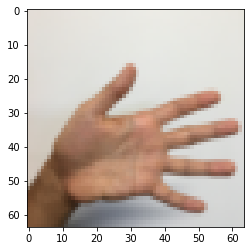

In [62]:
#loading the dataset
X_train_orig , Y_train_orig , X_test_orig , Y_test_orig , classes = load_dataset()

#example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))
#flatten data set

you flatten the image dataset , then normalize it by dividind by 255. On top of that, you will convert each label to a one-hot vector.

<b> NOTE : </b> that 12288 comes from *64 X 64 X 3* . Each image is square, 64 by 64 pixels, and 3 is for the RGB colors.

- build an algorithm capable of recognizing a sign with high accuracy. 
- the model is; LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX. 
- the sigmoid output layer has been converted to a softmax.
- a softmax layer generalizes sigmoid to when tjere are more than two classes

In [63]:
#flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

#normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

#convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig , 6)
Y_test = convert_to_one_hot(Y_test_orig , 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [64]:
def create_placeholders(n_x , n_y):
    
    X = tf.placeholder(tf.float32 , [n_x , None])
    Y = tf.placeholder(tf.float32 , [n_y , None])
    
    return X,Y
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [68]:
def initialize_parameters():
    
    tf.compat.v1.set_random_seed(1)
    
    W1 = tf.compat.v1.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.compat.v1.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.combat.v1.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.combat.v1.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.combat.v1.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.combat.v1.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as sess:
    
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

AttributeError: module 'tensorflow' has no attribute 'contrib'

In [70]:
def forward_propagation(X , parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1 , X), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2 , A1) , b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3 , A2) , b3)
    
    return Z3
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as sess:
    X , Y = create_placeholders(12288 , 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X , parameters)
    print("Z3 = " +str(Z3))

AttributeError: module 'tensorflow' has no attribute 'combat'

In [46]:
def compute_cost(Z3 , Y):
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entorpy_with_logits(logits = Z3 , labels = Y))
    
    return cost
tf.reset_default_graph()

with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

AttributeError: module 'tensorflow.compat.v1' has no attribute 'contrib'

after compute the cost function, create an 'optimizar' object. Call this object along with the cost when running the tf.sessoon . 
When called, it ll perofrm an optimization on the given cost with the chosen methos and learning rate
- <b> Gradient descent the optimizer :</b> 
optimizer=tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)



In [71]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
  
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
   
    X, Y = create_placeholders(n_x , n_y)
   

    # Initialize parameters
    
    parameters = initialize_parameters()
    
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    
    Z3 = forward_propagation(X , parameters)
    
    
    # Cost function: Add cost function to tensorflow graph
   
    cost = compute_cost(Z3 , Y)
   
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
   
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y}
           
                
                epoch_cost += minibatch_cost / minibatch_size

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

SyntaxError: invalid syntax (<ipython-input-71-5aa1b897a4fe>, line 65)

In [72]:
parameters = model(X_train, Y_train, X_test, Y_test)


NameError: name 'model' is not defined

In [73]:
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "thumbs_up.jpg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

AttributeError: module 'scipy.ndimage' has no attribute 'imread'

What you should remember:

- Tensorflow is a programming framework used in deep learning

- The two main object classes in tensorflow are Tensors and Operators.

- When you code in tensorflow you have to take the following steps:
- Create a graph containing Tensors (Variables, Placeholders ...) and Operations (tf.matmul, tf.add, ...)
- Create a session
- Initialize the session
- Run the session to execute the graph
- You can execute the graph multiple times as you've seen in model()
- The backpropagation and optimization is automatically done when running the session on the "optimizer" object.